In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

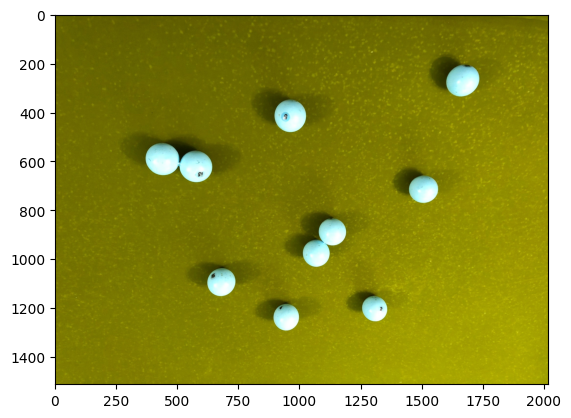

In [43]:
img = cv2.imread('whiteballs.jpg')
plt.imshow(img)

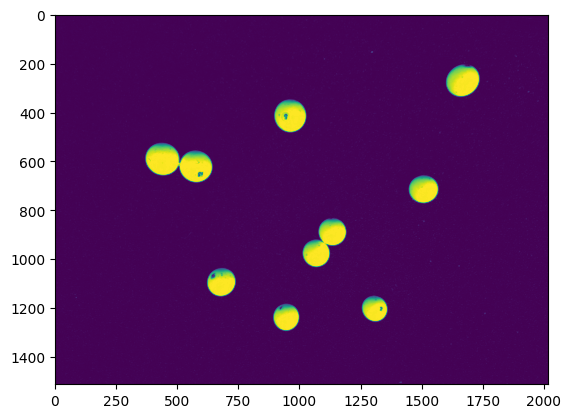

In [44]:
b = img[:, :, 2]
bw = cv2.merge([b]*3)
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
plt.imshow(bw)

In [45]:
threshold, thresh = cv2.threshold(bw, 20, 255, cv2.THRESH_BINARY)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
thresh = cv2.cvtColor(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 2, 40,
                              param1=200, param2=40, minRadius=0, maxRadius=100)

In [46]:
circles = np.uint16(np.around(circles))
radius_list = circles[0, :, 2]
mean = radius_list.mean()
d = ((radius_list - mean)**2).mean()
for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

Количество объектов:10
Средний радиус:59.5
Дисперсия:32.25


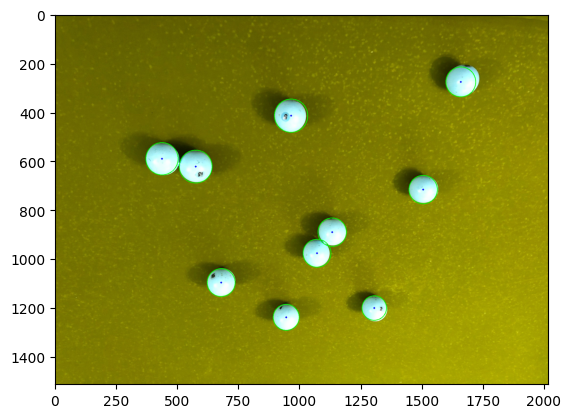

In [50]:
plt.imshow(img)
print(f'Количество объектов:{len(radius_list)}\nСредний радиус:{mean}\nДисперсия:{d}')